In [1]:
# importing the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [2]:
# Loading dataset from .csv file using pandas by providing the file path 
data = pd.read_csv("./Dataset/creditcard.csv")

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
# Head Function returns the first "n" rows for the object based on position. By default "n" values is 5.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Describing the data and the shape of the data
data = data.sample(frac = 0.1, random_state = 48) 
# Printing shape of data 
print(data.shape) 
print(data.describe()) 

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

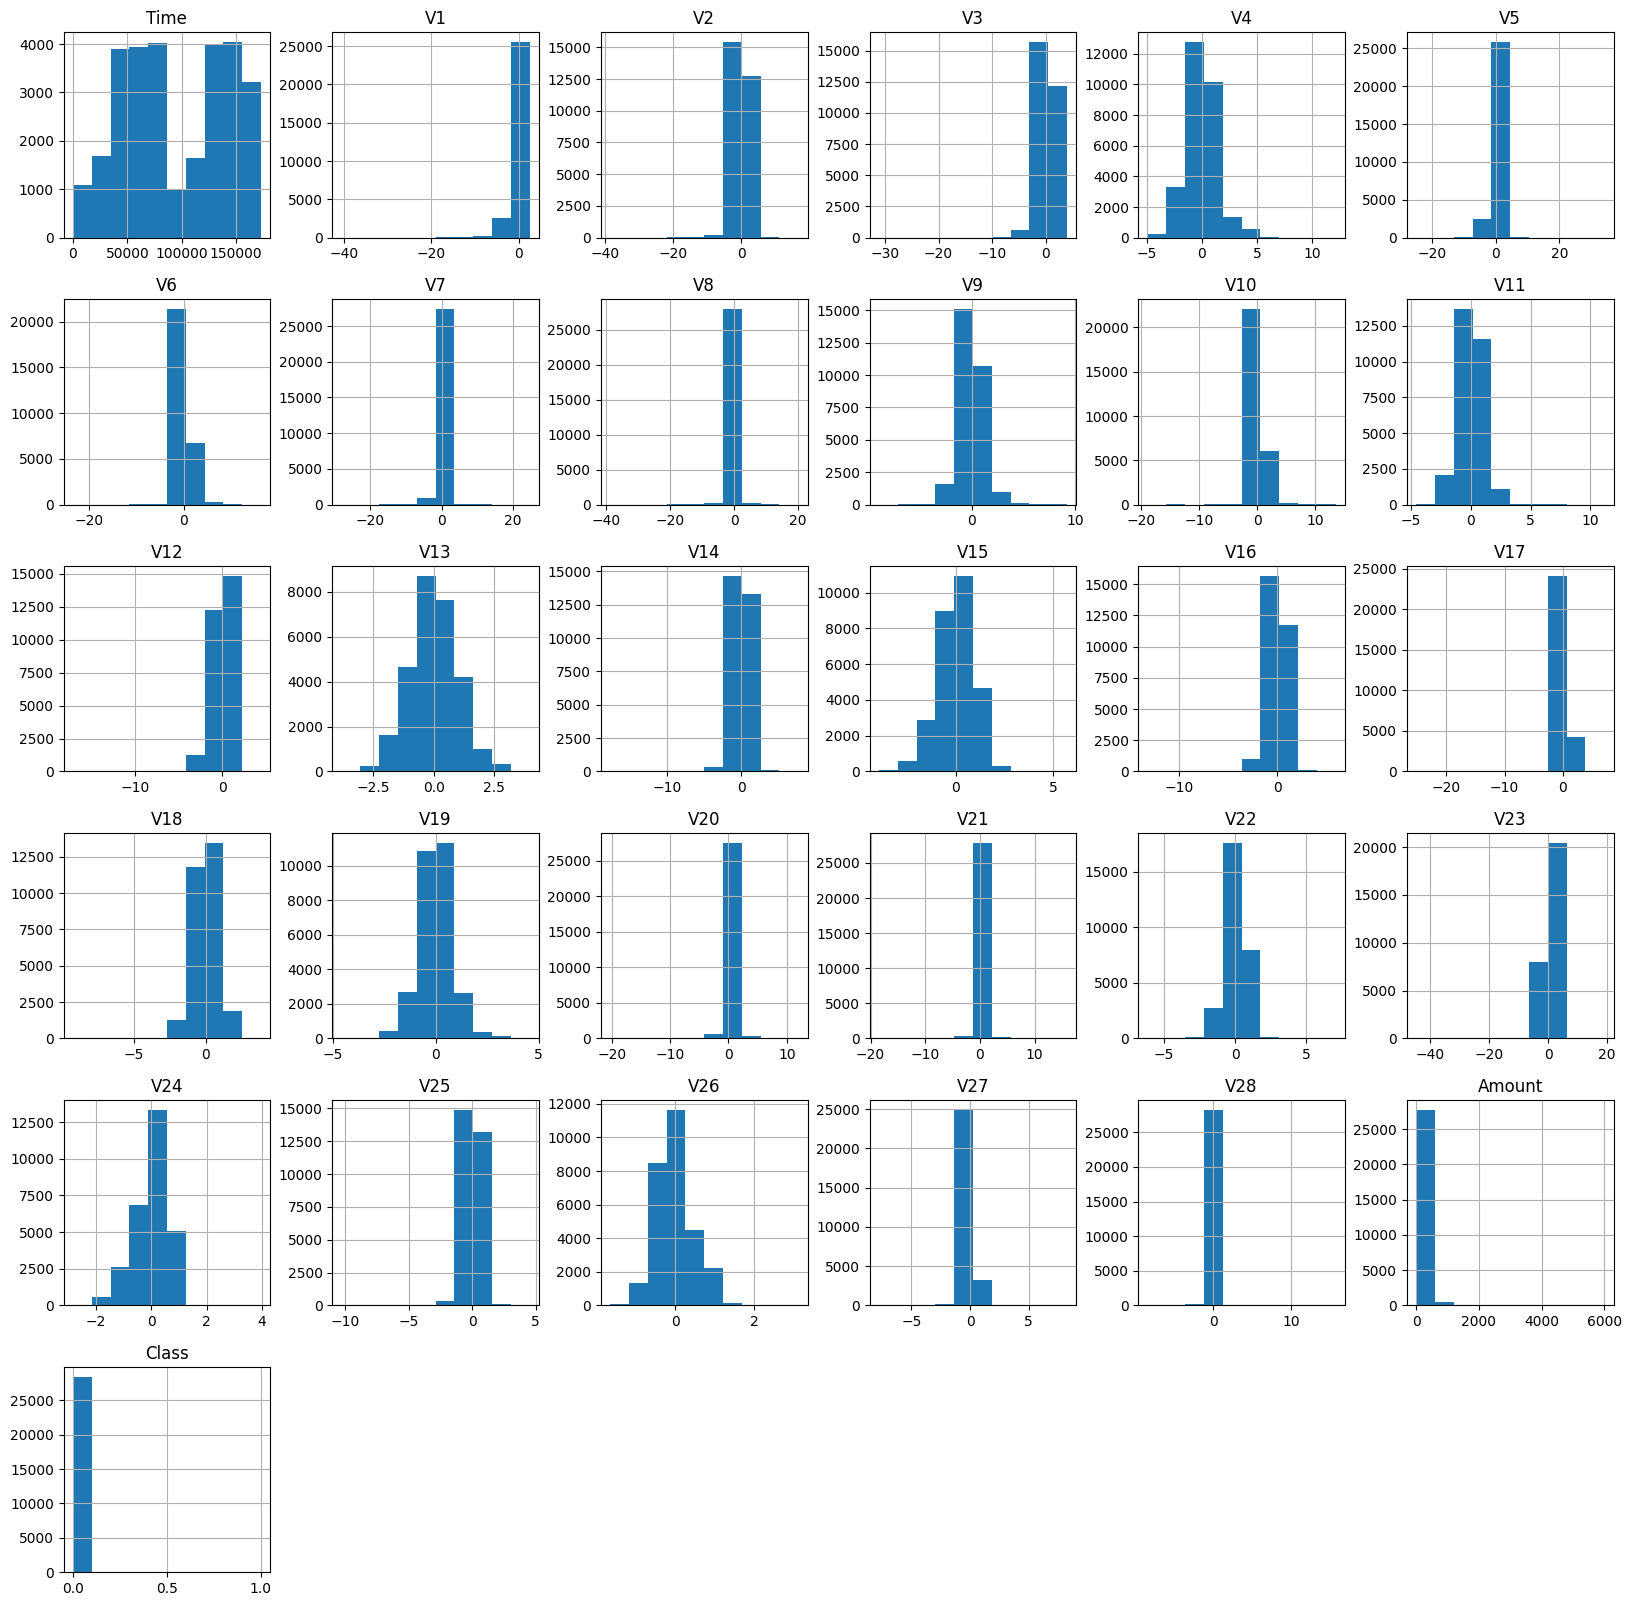

In [6]:
# Ploting histogram for each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [7]:
# Evaluating number of fraud cases in the dataset 
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0] 

outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction) 

print(f"Fraud Cases: {len(data[data['Class'] == 1])}")
print(f"Valid Transactions: {len(data[data['Class'] == 0])}") 

0.0019700967458223394
Fraud Cases: 56
Valid Transactions: 28425


In [8]:
print("Total details of the fraudulent transaction") 
fraud.Amount.describe() 

Total details of the fraudulent transaction


count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64

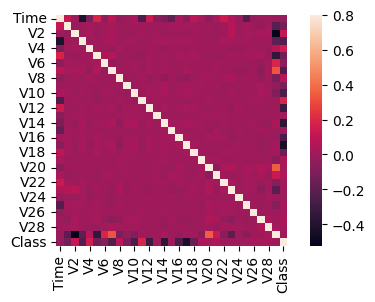

In [9]:
# Creating Correlation matrix 
correlation_matrix = data.corr() 
fig = plt.figure(figsize = (6, 3))

sns.heatmap(correlation_matrix, vmax = .8, square = True) 
plt.show() 

In [10]:
# Retrieving all the columns from dataFrame
columns = data.columns.tolist()

# Filter columns to remove unwanted data
columns = [c for c in columns if c not in ["Class"]]

# Store variable we will use for prediction
target = "Class"
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [11]:
# dividing the X and the Y from the dataset 
# X = data.drop(['Class'], axis = 1) 
X = data[columns] 
Y = data[target] 

print(X.shape) 
print(Y.shape) 
# using values for further processing  
xData = X.values 
yData = Y.values

(28481, 30)
(28481,)


In [12]:
# Using Scikit-learn module to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Splitting data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(xData,yData, test_size=0.2,random_state=42)

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef

# define random state
state = 1

# defining outlier detection tools which needs to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlierFraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlierFraction)}

plt.figure(figsize=(9, 7))
n_outliers = len(fraud)

<Figure size 900x700 with 0 Axes>

In [14]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshaping the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Classification metrics
    print(f"Model used is '{clf_name}': {n_errors}")
    
    acc = accuracy_score(Y, y_pred)
    print(f"The accuracy is {acc}") 

    prec = precision_score(Y, y_pred)
    print(f"The precision is {prec}") 

    rec = recall_score(Y, y_pred)
    print(f"The recall is {rec}") 

    f1 = f1_score(Y, y_pred)
    print(f"The F1-Score is {f1}") 

    MCC = matthews_corrcoef(Y, y_pred)
    print(f"The Matthews correlation coefficient is {MCC}",end='\n\n\n') 

Model used is 'Isolation Forest': 61
The accuracy is 0.9978582212703205
The precision is 0.45614035087719296
The recall is 0.4642857142857143
The F1-Score is 0.46017699115044247
The Matthews correlation coefficient is 0.4591221072439868


Model used is 'Local Outlier Factor': 113
The accuracy is 0.9960324426810856
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is -0.0019876440245577944


